# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import openweathermapy as ow
import sys
sys.path.append('Desktop/CU-NYC-DATA-PT-10-2019-U-C/Homework/06-Python-APIs/python-api-challenge/starter_code/')
import exp

# Import API key
#from api_keys import api_key


#config
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": api_key}

# Make a single test call on first city in list
current_weather_city_first = owm.get_current(cities[0], **settings)
print(f"Current weather object for {cities[0]}: {current_weather_city_first}.")

Current weather object for saint-philippe: {'coord': {'lon': -73.48, 'lat': 45.36}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.92, 'pressure': 1018, 'humidity': 63, 'temp_min': -2.78, 'temp_max': 1}, 'visibility': 14484, 'wind': {'speed': 10.8, 'deg': 180, 'gust': 14.4}, 'clouds': {'all': 90}, 'dt': 1575848223, 'sys': {'type': 1, 'id': 820, 'country': 'CA', 'sunrise': 1575807633, 'sunset': 1575839474}, 'timezone': -18000, 'id': 6138908, 'name': 'Saint-Philippe', 'cod': 200}.


In [22]:
# Import cities list into a DataFrame & rename columns 
column_names = ["City"]
cities_pd = pd.DataFrame(cities, columns=column_names)
cities_pd["Cloudiness"] = ""
cities_pd["Country"] = ""
cities_pd["Humidity"] = ""
cities_pd["Date"] = ""
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Windspeed"] = ""
print(len(cities_pd))
cities_pd.head()

590


,City,Cloudiness,Country,Humidity,Date,Lat,Lng,Max Temp,Windspeed
0,saint-philippe,,,,,,,,
1,sitka,,,,,,,,
2,veraval,,,,,,,,
3,hobart,,,,,,,,
4,mareeba,,,,,,,,


In [23]:
# Make successive API calls for all cities in list and print output to dataframe
# Include a print log of each city as it'sbeing processed (with the city number and city name).

for index, row in cities_pd.iterrows():
    name = row["City"]
    try:
        print(f"Processing for {name}.")
        current_weather_city = owm.get_current(name, **settings)
        cities_pd.loc[index, "Cloudiness"] = current_weather_city["clouds"]["all"]
        cities_pd.loc[index, "Country"] = current_weather_city["sys"]["country"]
        cities_pd.loc[index, "Humidity"] = current_weather_city["main"]["humidity"]
        cities_pd.loc[index, "Date"] = current_weather_city["dt"]
        cities_pd.loc[index, "Lat"] = current_weather_city["coord"]["lat"]
        cities_pd.loc[index, "Lng"] = current_weather_city["coord"]["lon"]
        cities_pd.loc[index, "Max Temp"] = current_weather_city["main"]["temp_max"]
        cities_pd.loc[index, "Windspeed"] = current_weather_city["wind"]["speed"]
        print("_______________________________")
        
    except:
        print("Missing field/result... skipping.")

Processing for saint-philippe.
_______________________________
Processing for sitka.
_______________________________
Processing for veraval.
_______________________________
Processing for hobart.
_______________________________
Processing for mareeba.
_______________________________
Processing for isangel.
_______________________________
Processing for georgetown.
_______________________________
Processing for hilo.
_______________________________
Processing for rikitea.
_______________________________
Processing for kodiak.
_______________________________
Processing for guerrero negro.
_______________________________
Processing for yicheng.
_______________________________
Processing for busselton.
_______________________________
Processing for puerto ayora.
_______________________________
Processing for ilulissat.
_______________________________
Processing for punta arenas.
_______________________________
Processing for micheweni.
_______________________________
Processing for belem.


_______________________________
Processing for grand gaube.
_______________________________
Processing for nome.
_______________________________
Processing for tuktoyaktuk.
_______________________________
Processing for vaini.
_______________________________
Processing for visnes.
_______________________________
Processing for gizo.
_______________________________
Processing for villa bruzual.
_______________________________
Processing for hasaki.
_______________________________
Processing for lethem.
_______________________________
Processing for longyearbyen.
_______________________________
Processing for rungata.
Missing field/result... skipping.
Processing for luwuk.
_______________________________
Processing for fortuna.
_______________________________
Processing for ciudad bolivar.
_______________________________
Processing for khanu woralaksaburi.
_______________________________
Processing for la primavera.
_______________________________
Processing for khonuu.
Missing field/res

_______________________________
Processing for vila velha.
_______________________________
Processing for najran.
_______________________________
Processing for san jose.
_______________________________
Processing for dikson.
_______________________________
Processing for cabo san lucas.
_______________________________
Processing for huangmei.
_______________________________
Processing for atambua.
_______________________________
Processing for along.
_______________________________
Processing for rudbar.
Missing field/result... skipping.
Processing for khanpur.
_______________________________
Processing for taltal.
_______________________________
Processing for rafaela.
_______________________________
Processing for faanui.
_______________________________
Processing for anloga.
_______________________________
Processing for ust-nera.
_______________________________
Processing for griffith.
_______________________________
Processing for puri.
_______________________________
Processing 

Missing field/result... skipping.
Processing for kralendijk.
_______________________________
Processing for hollins.
_______________________________
Processing for katobu.
_______________________________
Processing for tapaua.
Missing field/result... skipping.
Processing for namibe.
_______________________________
Processing for kuching.
_______________________________
Processing for limon.
_______________________________
Processing for bazaliya.
_______________________________
Processing for ayolas.
_______________________________
Processing for palana.
_______________________________
Processing for we.
Missing field/result... skipping.
Processing for straumen.
_______________________________
Processing for tabuk.
_______________________________
Processing for carauari.
_______________________________
Processing for vardo.
_______________________________
Processing for tomatlan.
_______________________________
Processing for jiddah.
Missing field/result... skipping.
Processing for bar

_______________________________
Processing for bay roberts.
_______________________________
Processing for manta.
_______________________________
Processing for tevriz.
_______________________________
Processing for solnechnyy.
_______________________________
Processing for black river.
_______________________________
Processing for sisimiut.
_______________________________
Processing for baruun-urt.
_______________________________
Processing for elliot lake.
_______________________________
Processing for atar.
_______________________________
Processing for watertown.
_______________________________
Processing for paamiut.
_______________________________
Processing for barmstedt.
_______________________________
Processing for divnomorskoye.
_______________________________
Processing for avera.
_______________________________


In [24]:
cities_pd = cities_pd.dropna(how='any')
cities_pd["Max Temp"] = pd.to_numeric(cities_pd["Max Temp"])
cities_pd["Lat"] = pd.to_numeric(cities_pd["Lat"])
cities_pd["Lng"] = pd.to_numeric(cities_pd["Lng"])
cities_pd["Cloudiness"] = pd.to_numeric(cities_pd["Cloudiness"])
cities_pd["Humidity"] = pd.to_numeric(cities_pd["Humidity"])
cities_pd["Windspeed"] = pd.to_numeric(cities_pd["Windspeed"])
print(len(cities_pd))
cities_pd.dtypes

590


City           object
Cloudiness    float64
Country        object
Humidity      float64
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Windspeed     float64
dtype: object

In [27]:
cities_pd.head(35)

,City,Cloudiness,Country,Humidity,Date,Lat,Lng,Max Temp,Windspeed
0,saint-philippe,90.0,CA,63.0,1575848223,45.36,-73.48,1.00,10.80
1,sitka,98.0,US,58.0,1575848238,37.17,-99.65,9.90,1.92
2,veraval,67.0,FR,93.0,1575848238,49.65,0.71,8.00,8.20
3,hobart,75.0,AU,35.0,1575848002,-42.88,147.33,23.33,5.70
4,mareeba,40.0,AU,48.0,1575848238,-16.99,145.42,31.11,5.10
5,isangel,75.0,VU,66.0,1575848238,-19.55,169.27,30.00,2.60
6,georgetown,40.0,GY,88.0,1575848165,6.80,-58.16,26.00,8.77
7,hilo,40.0,US,69.0,1575848238,19.71,-155.08,27.00,3.10
8,rikitea,99.0,PF,81.0,1575848238,-23.12,-134.97,23.24,11.30
9,kodiak,90.0,US,81.0,1575848239,39.95,-94.76,9.44,2.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

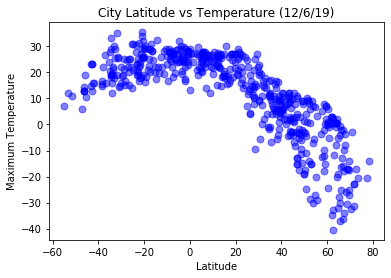

In [28]:
#### Latitude vs. Temperature Plot
# Create data
N = len(cities_pd)
x = cities_pd["Lat"]
y = cities_pd["Max Temp"]
colors = ("blue")
area = np.pi*15

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('City Latitude vs Temperature (12/6/19)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.show()


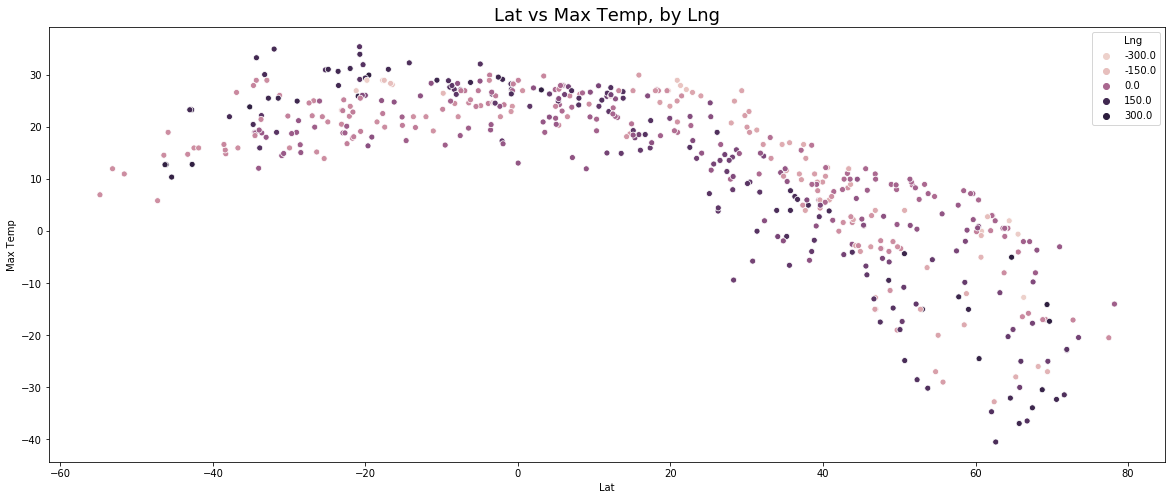

In [29]:
#Bonus Visualization: Bivariate chart with added hue for longitude   
exp.plot_bivariate(cities_pd, 'Lat', 'Max Temp', hue='Lng', alpha=1.0)

#### Latitude vs. Humidity Plot

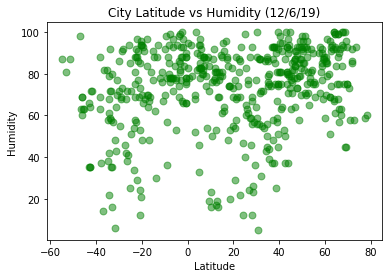

In [36]:
# Create data
N = len(cities_pd)
x = cities_pd["Lat"]
y = cities_pd["Humidity"]
colors = ("green")
area = np.pi*15

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('City Latitude vs Humidity (12/6/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


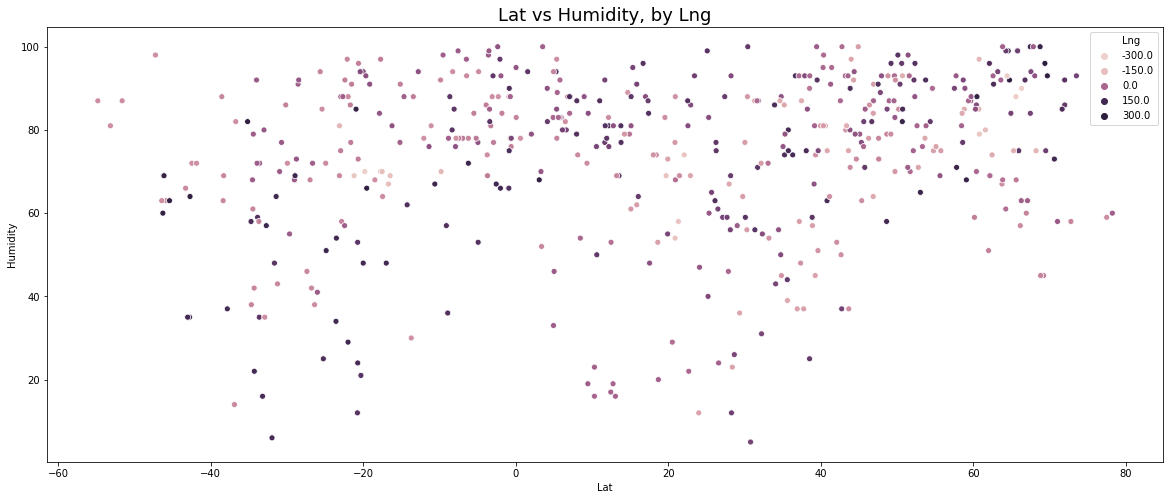

In [31]:
#Bonus Visualization: Bivariate chart with added hue for longitude   
exp.plot_bivariate(cities_pd, 'Lat', 'Humidity', hue='Lng', alpha=1.0)

#### Latitude vs. Cloudiness Plot

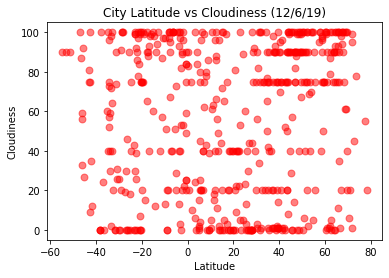

In [37]:
# Create data
N = len(cities_pd)
x = cities_pd["Lat"]
y = cities_pd["Cloudiness"]
colors = ("red")
area = np.pi*15

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('City Latitude vs Cloudiness (12/6/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()


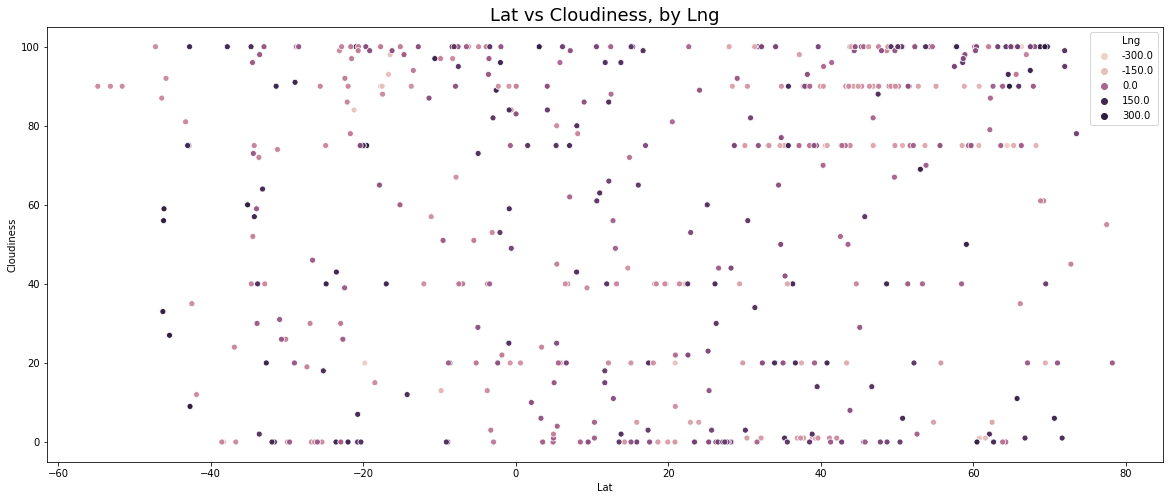

In [33]:
#Bonus Visualization: Bivariate chart with added hue for longitude   
exp.plot_bivariate(cities_pd, 'Lat', 'Cloudiness', hue='Lng', alpha=1.0)

#### Latitude vs. Wind Speed Plot

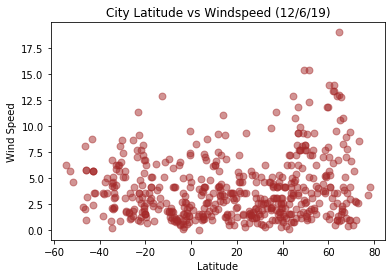

In [38]:
# Create data
N = len(cities_pd)
x = cities_pd["Lat"]
y = cities_pd["Windspeed"]
colors = ("brown")
area = np.pi*15

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('City Latitude vs Windspeed (12/6/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()


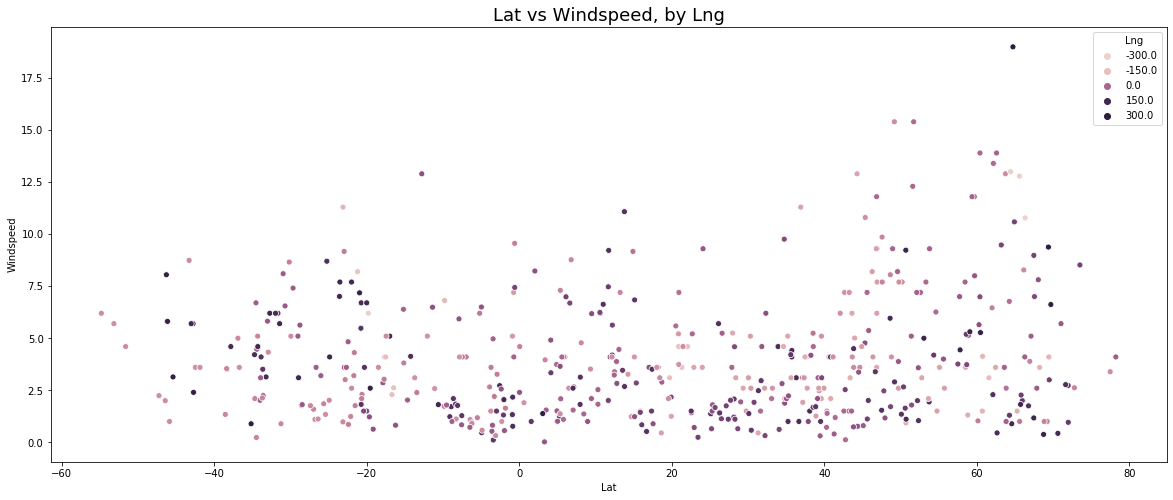

In [35]:
#Bonus Visualization: Bivariate chart with added hue for longitude   
exp.plot_bivariate(cities_pd, 'Lat', 'Windspeed', hue='Lng', alpha=1.0)